# Topics Covered:
-   Image Convolution
-   Image Denoising
-   Edge Detection


# Image Convolution

![image.png](https://miro.medium.com/v2/resize:fit:1400/1*D6iRfzDkz-sEzyjYoVZ73w.gif)

###### Import required libraries


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from time import time

###### Zero pad image

In [7]:
def zero_pad(img,k):
    h,w = img.shape
    pad = np.floor(k/2)

    new_h = int(h+2*pad)
    new_w = int(w+2*pad)
    new_img = np.zeros((new_h,new_w))

    for i in range(h):
        for j in range(w):
            new_img[int(i+pad),int(j+pad)] = img[i,j]

    return new_img

###### Image convolution given image segment and kernel

In [8]:
def convolve(img_seg,kernel):
    return np.sum(np.multiply(img_seg,kernel))

#### Mean Filter:
$$ k = \begin{bmatrix} 1/9& 1/9& 1/9\\ 1/9& 1/9& 1/9 \\ 1/9& 1/9& 1/9\end{bmatrix} $$


In [9]:
def mean_filter(img,k):
    h,w = img.shape
    f_img = np.empty((h,w),dtype=np.uint8)
    kernel = np.full((k,k),1/k**2)
    pad = int(np.floor(k/2))
    img = zero_pad(img,k)

    s = time()
    for i in range(pad , h+pad):
        for j in range(pad, w+pad):
            f_img[i-pad,j-pad] = convolve(img[i-pad:i+pad+1, j-pad:j+pad+1], kernel)
    e = time()
    return f_img,e-s

###### Display Image

(-0.5, 319.5, 239.5, -0.5)

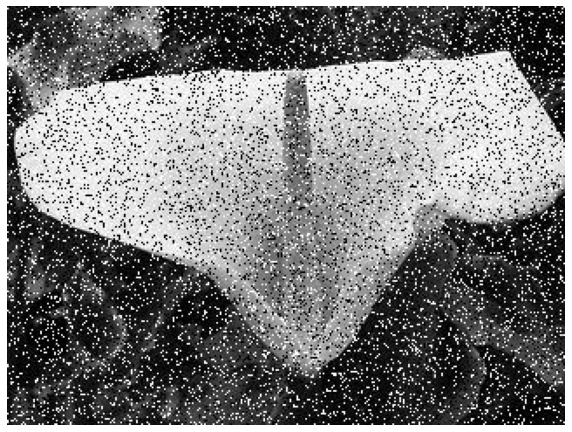

In [10]:
img = cv2.imread("../images/Noisy.jpg",0)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap = 'gray')
plt.axis('off')

###### Run mean filter

(-0.5, 319.5, 239.5, -0.5)

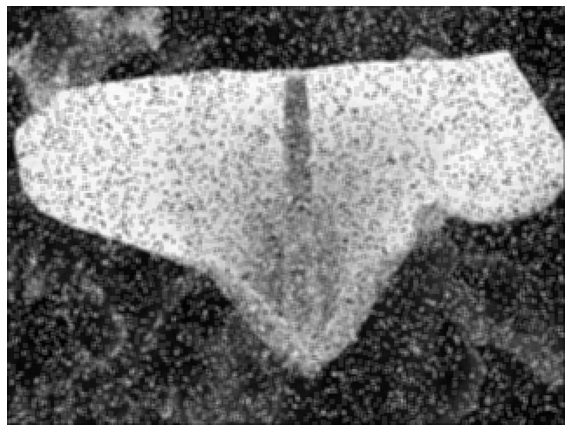

In [11]:
k = 3
blur_img,t = mean_filter(img,k)
fig = plt.figure(figsize=(10,10))
plt.imshow(blur_img,cmap = 'gray')
plt.axis('off')

###### Efficient Mean Filter

In [12]:
def eff_mean_filter(img,k):
    kernel = np.full((k,k),1/k**2)

    s = time()
    img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

    e = time()
    return img, e-s

Run efficient mean filter


(-0.5, 319.5, 239.5, -0.5)

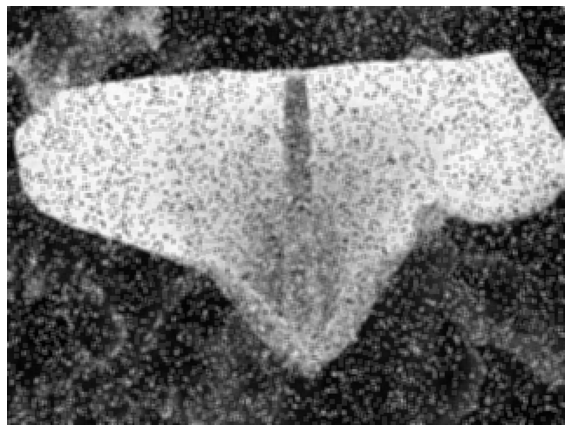

In [13]:
k = 3
img = cv2.imread("../images/Noisy.jpg",0)

blur_img,_ = eff_mean_filter(img,k)
fig = plt.figure(figsize=(10,10))
plt.imshow(blur_img,cmap = 'gray')
plt.axis('off')

###### Check time taken for both convolution operation

In [14]:
img = cv2.imread("../images/Noisy.jpg",0)
img_64 = cv2.resize(img, (64,64))
img_128 = cv2.resize(img, (128,128))
img_256 = cv2.resize(img, (512,512))
img_1024 = cv2.resize(img, (1024,1024))

images = [img_64,img_128,img_256,img_1024]

k = np.array([3,11,21,35])
brute_time = np.empty((len(k),len(images)))
eff_time = np.empty((len(k),len(images)))


for i in range(len(k)):
    for j in range(len(images)):
        _,val = mean_filter(images[j],k[i])
        brute_time[i,j] = val


        _,val = eff_mean_filter(images[j],k[i])
        eff_time[i,j] = val

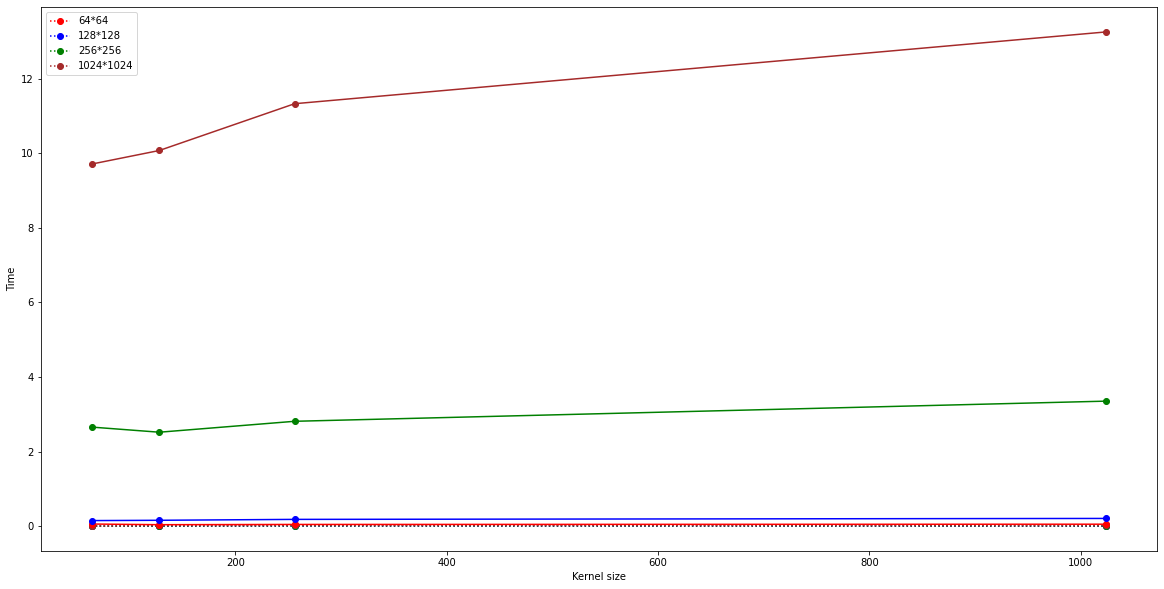

In [18]:
plt.figure(figsize=(20,10))


k = np.array([64,128,256,1024])
plt.plot(k,eff_time[:,0],marker='o',label="64*64",linestyle="dotted",color="red")
plt.plot(k,eff_time[:,1],marker='o',label="128*128",linestyle="dotted",color="blue")
plt.plot(k,eff_time[:,2],marker='o',label="256*256",linestyle="dotted",color="green")
plt.plot(k,eff_time[:,3],marker='o',label="1024*1024",linestyle="dotted",color="brown")

plt.plot(k,brute_time[:,0],marker='o',color="red")
plt.plot(k,brute_time[:,1],marker='o',color="blue")
plt.plot(k,brute_time[:,2],marker='o',color="green")
plt.plot(k,brute_time[:,3],marker='o',color="brown")
plt.xlabel("Kernel size")
plt.ylabel("Time")
plt.legend()

###### Median Filter

In [14]:
def median_filter(img,k):
    h,w = img.shape
    f_img = np.empty((h,w),dtype=np.uint8)
    pad = int(np.floor(k/2))
    img = zero_pad(img,k)

    for i in range(pad , h+pad):
        for j in range(pad, w+pad):
            f_img[i-pad,j-pad] = np.median(img[i-pad:i+pad+1, j-pad:j+pad+1])

    return f_img

(-0.5, 319.5, 239.5, -0.5)

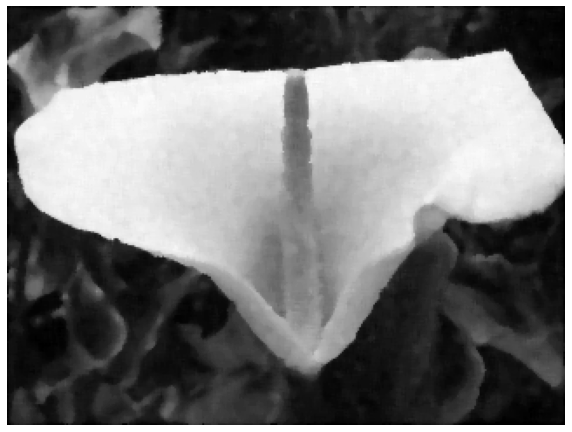

In [15]:
k = 5
img = cv2.imread("../images/Noisy.jpg",0)
fil_img = median_filter(img,k)
fig = plt.figure(figsize=(10,10))
plt.imshow(fil_img,cmap = 'gray')
plt.axis('off')

# Edge Detection


(-0.5, 539.5, 642.5, -0.5)

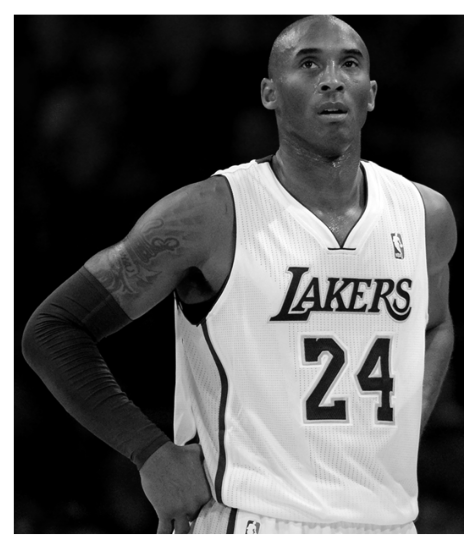

In [22]:
img = cv2.imread("../images/kobe.png",0)
fig = plt.figure(figsize=(10,10))
plt.imshow(img,cmap = 'gray')
plt.axis('off')

# Different Edge detection filter

![image.png](../images/edge_detection.png)

In [ ]:
#Prewitt filter
def prewitt(img,k):
    h,w = img.shape
    p_x = np.empty((h,w))
    p_y = np.empty((h,w))
    p = np.empty((h,w),dtype=np.uint8)
    if k==3:
        kernel_x =  np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        kernel_y =  np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
        
        img = zero_pad(img,kernel_x.shape[0])

    else:
        #initialize 5*5 filter



    p_x = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_x)
    p_y = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_y)


    #combine p_x and p_y to form image

    return p


In [24]:
#Sobel filter
def sobel(img,k):

    h,w = img.shape
    s = np.empty((h,w),dtype=np.uint8)
    if(k==3):
        kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        kernel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
        img = zero_pad(img,kernel_x.shape[0])
    else:
        kernel_x = (1/10)*np.array([[1,2,0,-2,-1],[4,8,0,-8,-4],[6,12,0,-12,-6],[4,8,0,-8,-4],[1,2,0,-2,-1]])
        kernel_y = (1/10)*np.array([[1,4,6,4,1],[2,8,12,8,2],[0,0,0,0,0],[-2,-8,-12,-8,-2],[-1,-4,-6,-4,-1]])
        img = zero_pad(img,kernel_x.shape[0])


    s_x = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_x)
    s_y = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_y)

    #combine p_x and p_y to form image

    return s

In [25]:
#Roberts filter

def robert(img):
    h,w = img.shape 
    r = np.empty((h,w),dtype=np.uint8)

    kernel_x = np.array([[0,1],[-1,0]])
    kernel_y = np.array([[1,0],[0,-1]])
    img = zero_pad(img,kernel_x.shape[0])


    r_x = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_x)
    r_y = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_y)

    #combine p_x and p_y to form image

    return r

###### Laplacian Filter

![image.png](../images/conv-laplacian.jpg)

In [26]:
#Laplacian filter

def laplacian(img):
    h,w = img.shape
    l = np.empty((h,w) )
    k=3
    kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])


    l = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

    return l


In [27]:
img = cv2.imread('../images/kobe.png',0)
r = robert(img)
s = sobel(img,3)
p = prewitt(img,3)
l = laplacian(img)

(-0.5, 539.5, 642.5, -0.5)

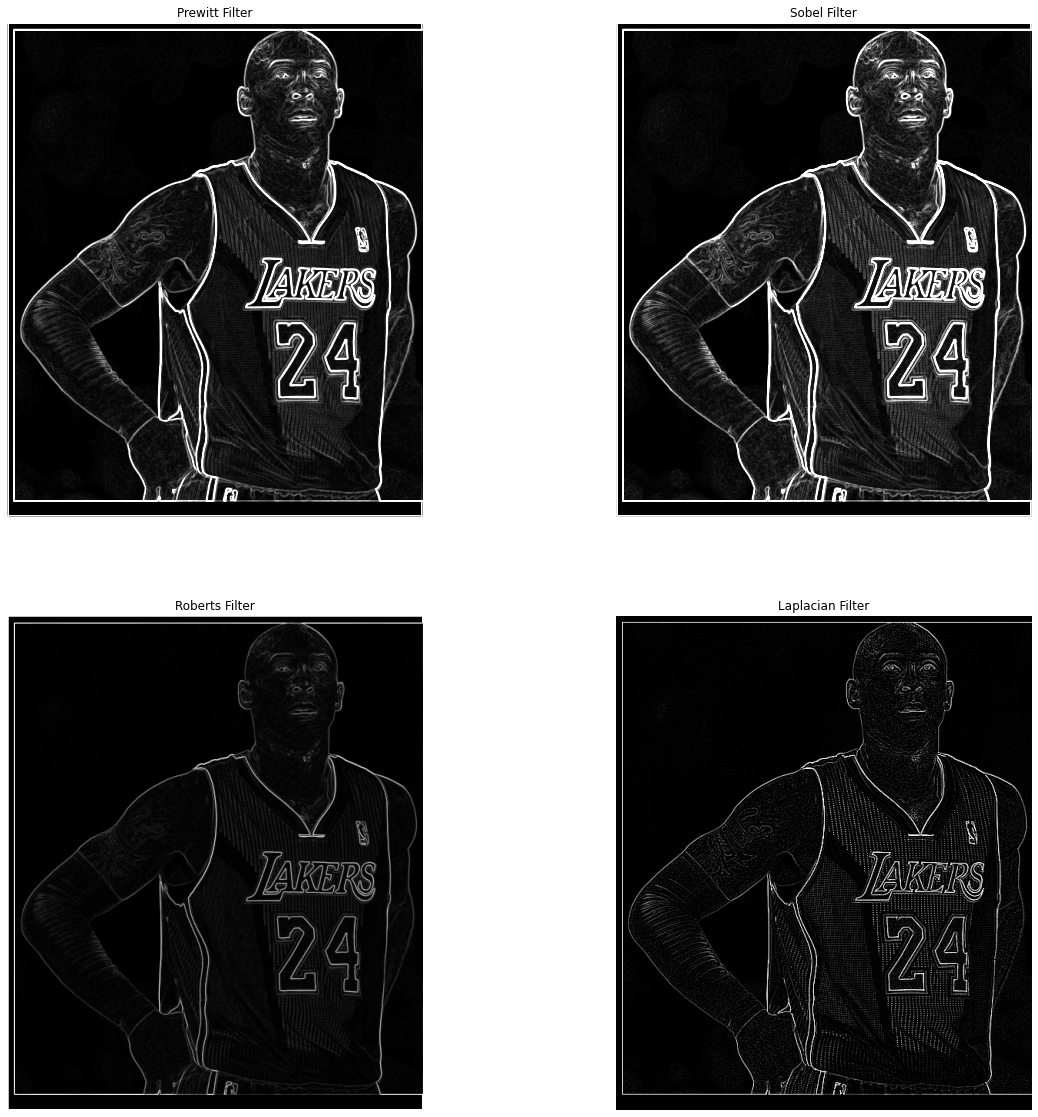

In [28]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(2,2,1)
ax.imshow(p,cmap='gray',vmin=0,vmax=255)
ax.set_title("Prewitt Filter")
ax.axis('off')


ax = fig.add_subplot(2,2,2)
ax.imshow(s,cmap='gray',vmin=0,vmax=255)
ax.set_title("Sobel Filter")
ax.axis('off')


ax = fig.add_subplot(2,2,3)
ax.imshow(r,cmap='gray',vmin=0,vmax=255)
ax.set_title("Roberts Filter")
ax.axis('off')


ax = fig.add_subplot(2,2,4)
ax.imshow(l,cmap='gray',vmin=0,vmax=255)
ax.set_title("Laplacian Filter")
ax.axis('off')

#### Opencv edge detections

(-0.5, 539.5, 642.5, -0.5)

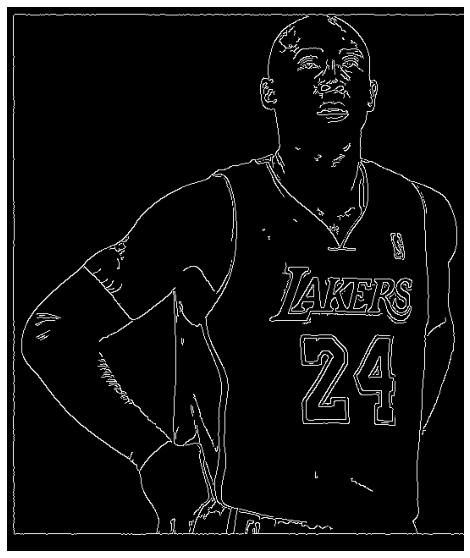

In [34]:
img = cv2.imread('../images/kobe.png',0)
canny = cv2.Canny(img, threshold1=100, threshold2=200)
fig = plt.figure(figsize=(10,10))
plt.imshow(canny,cmap = 'gray')
plt.axis('off')

# Image Sharpening

$$ k = \begin{bmatrix} 0& -1& 0\\ -1& 5 & -1 \\ 0& -1& 0\end{bmatrix} $$

In [35]:
# Sharpening filter

def sharpening(img):
    h,w = img.shape
    l = np.empty((h,w) )
    k=3
    kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

    s = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

    return s


(-0.5, 539.5, 642.5, -0.5)

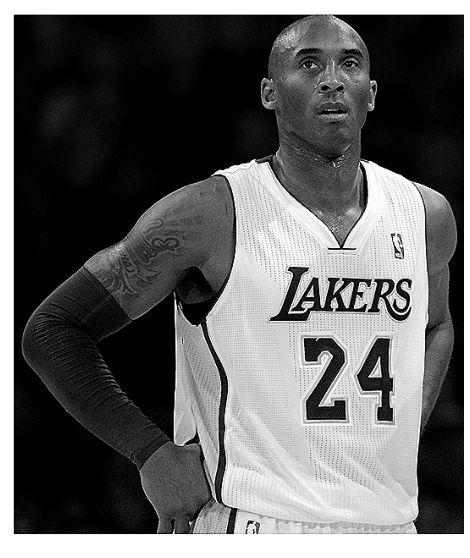

In [36]:
img = cv2.imread('../images/kobe.png',0)
s_img = sharpening(img)
fig = plt.figure(figsize=(10,10))
plt.imshow(s_img,cmap = 'gray')
plt.axis('off')

# Bilateral Filter

![image.png](../images/bilateral.png)

In [37]:
def get_val(img_seg,k ):
    sigma_g = 10
    sigma_s = 50
    kernel = np.empty((k,k))
    p = int(np.floor(k/2) +1)
    q = int(np.floor(k/2) +1)
#     print(p,q)
    for i in range(k):
        for j in range(k):
            #code gaussian intensity values g_val
            #code image intensity values s_val
            kernel[i,j] = np.exp( -g_val-s_val)

    n_val = np.sum(np.sum(kernel,axis=1))
    return convolve(img_seg,kernel)/n_val

In [38]:
def bilateral_filter(img,k):
    h,w = img.shape
    f_img = np.empty((h,w))
    pad = int(np.floor(k/2))
    img = zero_pad(img,k)
    t = np.zeros((k,k))
    t[:,:int(k/2)]=255

    for i in range(pad , h+pad):
        for j in range(pad, w+pad):
            f_img[i-pad,j-pad] = get_val(img[i-pad:i+pad+1,j-pad:j+pad+1],k)


    return f_img


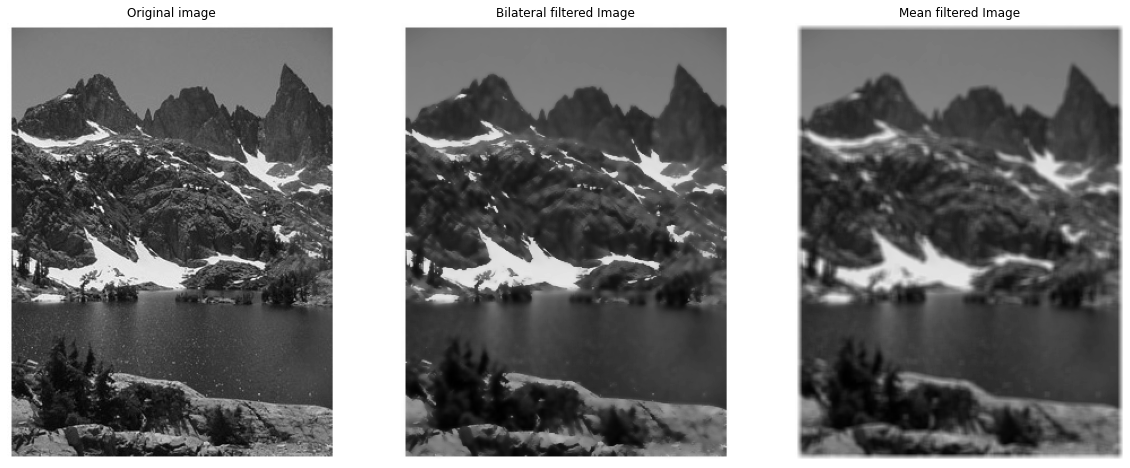

In [39]:
k = 5
img = cv2.imread("../images/mountain.jpg",0)
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,3,1)
ax.imshow(img,cmap = 'gray')
ax.set_title('Original image')
ax.axis('off')

bfil_img  = bilateral_filter(img,k)

ax = fig.add_subplot(1,3,2)
ax.imshow(bfil_img,cmap = 'gray')
ax.set_title("Bilateral filtered Image")
ax.axis('off')

mean_img,_ = eff_mean_filter(img,k)

ax = fig.add_subplot(1,3,3)
ax.imshow(mean_img,cmap = 'gray')
ax.set_title("Mean filtered Image")
ax.axis('off')

plt.show()